## ***2차시: 이미지 라벨링***
- 이미지 인식 모델의 입력은 이미지 입니다
- 이미지가 숫자라는 것을 1차시에 이해하였습니다
- 이미지 인식 모델의 출력은 인식 결과 입니다
- 그 출력을 정의하는 라벨링에 대해 알아봅니다
- 2차시에서는 결국 이미지 라벨링도 숫자 라는 점을 이해하도록 하겠습니다

In [ ]:
! pip install tensorflow

## ***MNIST 데이터 셋***
- 손글씨 공개 데이터 입니다
- 28x28 크기의 이미지 70,000장을 제공합니다

### ***학습용 이미지***
- 70,000장 중에서 60,000장으로 구성되어 있습니다
- 이 중에서 학습용 이미지를 직접 확인해봅니다

학습용 입력이미지: 60000장, 테스트용 입력이미지: 10000장


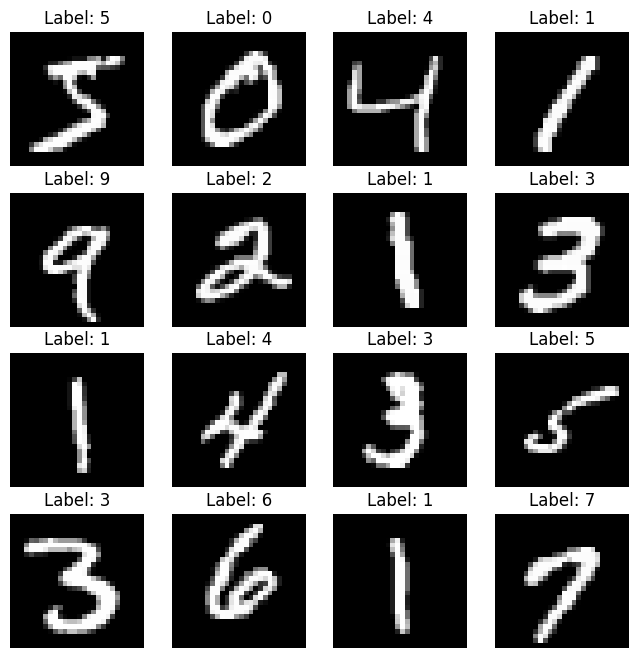

In [6]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

samples = 16

sqrt_samples = int(math.sqrt(samples))

print(f'학습용 입력이미지: {len(x_train)}장, 테스트용 입력이미지: {len(x_test)}장')

# 샘플 9개 시각화
plt.figure(figsize=(sqrt_samples*2, sqrt_samples*2))
for i in range(samples):
    plt.subplot(sqrt_samples, sqrt_samples, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


#### ***테스트 이미지***
- 이어서 테스트 이미지를 확인해봅니다

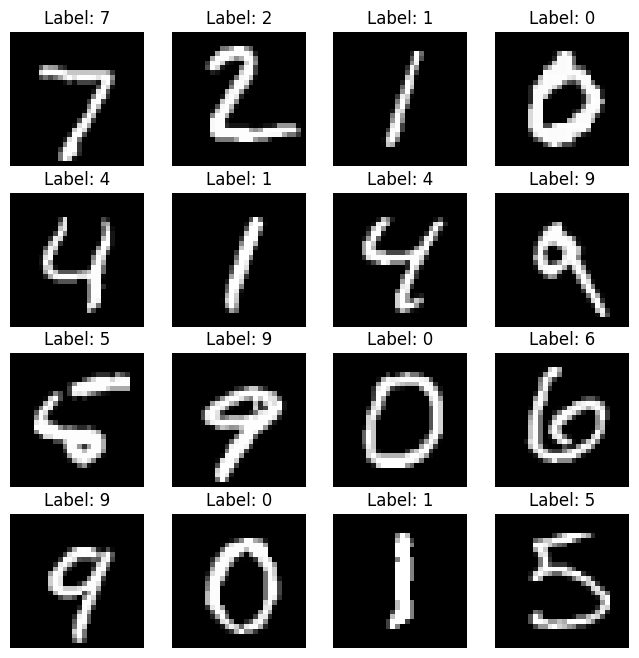

In [7]:
plt.figure(figsize=(sqrt_samples*2, sqrt_samples*2))
for i in range(samples):
    plt.subplot(sqrt_samples, sqrt_samples, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

## ***모델의 입력과 출력***
- 모델은 함수와 같습니다
- 사람은 데이터를 주고 컴퓨터는 모델을 학습하여 만듭니다
- 이 때의 데이터는 입력과 출력 입니다

### 입력
- 28x28 의 흑백 이미지 -> 28x28x1 
- 단, 색상 성분은 0 ~ 1사이의 소수점 값으로 변환 -> 정규화
- 만약 색상 정보가 다른 이미지였다면 정규화는 필수

### 출력
- 0 ~ 9 사이의 숫자
- 단, 이것을 10개의 숫자: 숫자 0일 확률, 숫자 1일 확률, 숫자 2일 확률 ... 숫자 9일 확률로 변환
- 예를 들어 출력이 7 이라면
  - 손글씨가 0일 확률: 0.0
  - 손글씨가 1일 확률: 0.0
  - 손글씨가 2일 확률: 0.0
  - 손글씨가 3일 확률: 0.0
  - 손글씨가 4일 확률: 0.0
  - 손글씨가 5일 확률: 0.0
  - 손글씨가 6일 확률: 0.0
  - 손글씨가 7일 확률: 1.0
  - 손글씨가 8일 확률: 0.0
  - 손글씨가 9일 확률: 0.0

### 실제 모델의 출력
- AI에서 100%는 없다는 말을 아마 들어보신 적이 있을 것입니다
- 잘 학습된 모델은 예를 들어 아래와 같이 10개의 숫자를 출력할 수 있습니다
  - 손글씨가 0일 확률: 0.0001
  - 손글씨가 1일 확률: 0.0002
  - 손글씨가 2일 확률: 0.0001
  - 손글씨가 3일 확률: 0.0001
  - 손글씨가 4일 확률: 0.0002
  - 손글씨가 5일 확률: 0.0001
  - 손글씨가 6일 확률: 0.0001
  - 손글씨가 7일 확률: 0.9989
  - 손글씨가 8일 확률: 0.0001
  - 손글씨가 9일 확률: 0.0001
- AI라는 모델은 오차가 0이 되게 학습한다기 보다는 오차가 0에 가까워지는 방향으로 학습을 해 나갑니다
- 따라서 오차가 0에 매우 근접하게 학습이 될 수는 있지만 완전한 0이 되기는 어렵습니다

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# 데이터셋 다운로드
# 28x28 크기의 손글씨 이미지들
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화 및 차원 확장 (28,28) → (28,28,1)
# 색상 성분을 0 ~ 1 사이의 소수점 값으로 변환
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

# 학습을 위한 인공신경망 모델 정의
# 28x28 이미지를 입력으로 하여 10개의 숫자를 출력하는 모델
# 10개의 숫자: 숫자 0일 확률, 숫자 1일 확률, 숫자 2일 확률 ... 숫자 9일 확률
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# --- 3. 컴파일 ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 4. 학습 ---
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.1)

# --- 5. 테스트 정확도 ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


c:\Users\minsul\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.8559 - loss: 0.4959 - val_accuracy: 0.9813 - val_loss: 0.0619
Test Accuracy: 0.9806


### ***우리의 손글씨를 인식 시켜보기***
- 학습할 때 이미지를 28x28크기의 흑백이미지로 구성하였습니다
- 학습할 때 이미지 색상 성분을 정규화 하였습니다
- 그 과정을 동일하게 하여 인식을 시키면 10개의 숫자가 나올 것입니다
- 그 중에서 가장 큰 숫자가 인식 결과가 됩니다

#### ***확인해볼 사항***
- 글씨를 작게 쓴 그림을 인식시켜보기
- 글씨를 꽉 차게 쓴 그림을 인식시켜보기
- 검정 바탕에 흰색 글씨 그림을 인식시켜보기
- 흰색 바탕에 검정색 글씨 그림을 인식시켜보기

In [30]:
import cv2
import numpy as np

# 이미지를 흑백으로 읽기
img = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)

# 2. 전처리 (28x28, 정규화)
img = cv2.resize(img, (28, 28))        # 크기 맞추기
img = img.astype("float32") / 255.0    # 0~1 정규화

# 3. 모델 입력 형태 맞추기 (batch, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# 4. 예측
pred = model.predict(img)
import numpy as np

np.set_printoptions(suppress=True, precision=6)
print("각 숫자별 확률:")
for i, p in enumerate(pred[0]):
    print(f"{i}: {p:.6f}")

# 5. argmax로 최종 숫자
digit = np.argmax(pred[0])
print("예측된 숫자:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
각 숫자별 확률:
0: 0.064344
1: 0.000796
2: 0.018303
3: 0.023605
4: 0.007450
5: 0.000916
6: 0.037289
7: 0.000905
8: 0.844970
9: 0.001422
예측된 숫자: 8


## ***해결방법1: 인식전에 이미지 반전시키기***
- 모델이 인식하는 숫자로 변환하기 전에 반전된 이미지를 만듭니다

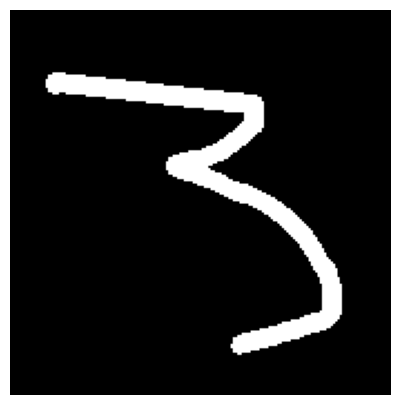

In [34]:
import cv2
import numpy as np

# 이미지를 흑백으로 읽기
img = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)

# 이미지 반전시키기
img = 255 - img
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [31]:
import cv2
import numpy as np

# 이미지를 흑백으로 읽기
img = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)

# 이미지 반전시키기
img = 255 - img

# 2. 전처리 (28x28, 정규화)
img = cv2.resize(img, (28, 28))        # 크기 맞추기
img = img.astype("float32") / 255.0    # 0~1 정규화

# 3. 모델 입력 형태 맞추기 (batch, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# 4. 예측
pred = model.predict(img)
import numpy as np

np.set_printoptions(suppress=True, precision=6)
print("각 숫자별 확률:")
for i, p in enumerate(pred[0]):
    print(f"{i}: {p:.6f}")

# 5. argmax로 최종 숫자
digit = np.argmax(pred[0])
print("예측된 숫자:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
각 숫자별 확률:
0: 0.000001
1: 0.000004
2: 0.000496
3: 0.998503
4: 0.000002
5: 0.000087
6: 0.000000
7: 0.000190
8: 0.000573
9: 0.000144
예측된 숫자: 3


## ***해결방법2: 새로운 모델 학습 계획***
- 반전이미지를 학습에 추가해봅시다

학습용 입력이미지: 60000장, 테스트용 입력이미지: 10000장


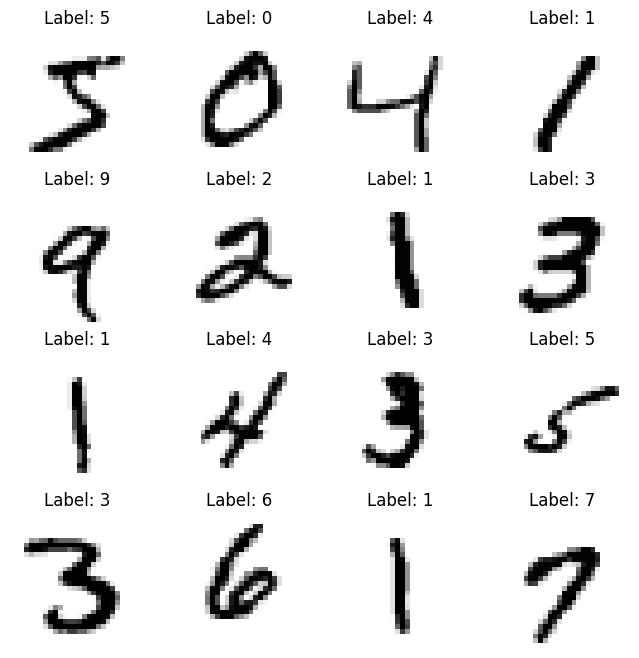

In [ ]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# --- 2. 반전 데이터 생성 ---
x_train_inverted = 255 - x_train
x_test_inverted  = 255 - x_test

samples = 16

sqrt_samples = int(math.sqrt(samples))

print(f'학습용 추가이미지: {len(x_train_inverted)}장, 테스트용 추가이미지: {len(x_test_inverted)}장')

# 샘플 9개 시각화
plt.figure(figsize=(sqrt_samples*2, sqrt_samples*2))
for i in range(samples):
    plt.subplot(sqrt_samples, sqrt_samples, i+1)
    plt.imshow(x_train_inverted[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


- 테스트용 데이터도 반전 데이터를 확인해봅니다

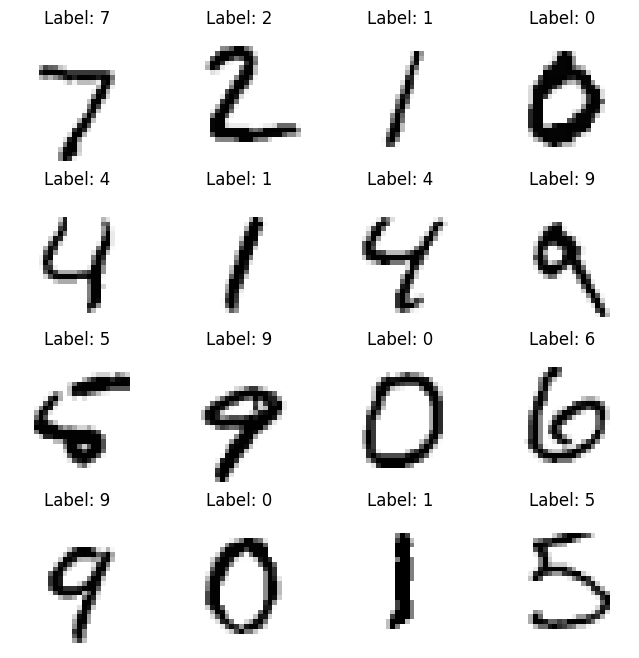

In [23]:
plt.figure(figsize=(sqrt_samples*2, sqrt_samples*2))
for i in range(samples):
    plt.subplot(sqrt_samples, sqrt_samples, i+1)
    plt.imshow(x_test_inverted[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

## ***반전 데이터를 학습하는 모델 만들기***

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

# --- 1. 데이터 불러오기 ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# --- 2. 반전 데이터 생성 ---
x_train_inverted = 255 - x_train
x_test_inverted  = 255 - x_test

# --- 3. 원본 + 반전 데이터 합치기 ---
x_train = np.concatenate([x_train, x_train_inverted], axis=0)
y_train = np.concatenate([y_train, y_train], axis=0)

x_test = np.concatenate([x_test, x_test_inverted], axis=0)
y_test = np.concatenate([y_test, y_test], axis=0)

# --- 4. 정규화 및 차원 확장 ---
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test  = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

# --- 5. 모델 정의 ---
new_model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# --- 6. 컴파일 ---
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 7. 학습 ---
new_model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.1)

# --- 8. 테스트 ---
test_loss, test_acc = new_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


c:\Users\minsul\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 35ms/step - accuracy: 0.8694 - loss: 0.4255 - val_accuracy: 0.9785 - val_loss: 0.0746
Test Accuracy: 0.9796


In [ ]:
import cv2
import numpy as np

# 이미지를 흑백으로 읽기
img = cv2.imread("3.png", cv2.IMREAD_GRAYSCALE)

# 2. 전처리 (28x28, 정규화)
img = cv2.resize(img, (28, 28))        # 크기 맞추기
img = img.astype("float32") / 255.0    # 0~1 정규화

# 3. 모델 입력 형태 맞추기 (batch, 28, 28, 1)
img = img.reshape(1, 28, 28, 1)

# 4. 예측
pred = new_model.predict(img)
import numpy as np

np.set_printoptions(suppress=True, precision=6)
print("각 숫자별 확률:")
for i, p in enumerate(pred[0]):
    print(f"{i}: {p:.6f}")

# 5. argmax로 최종 숫자
digit = np.argmax(pred[0])
print("예측된 숫자:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
각 숫자별 확률:
0: 0.000000
1: 0.000002
2: 0.000040
3: 0.999002
4: 0.000000
5: 0.000188
6: 0.000000
7: 0.000467
8: 0.000233
9: 0.000069
예측된 숫자: 3


## ***만약 알파벳을 인식하는 모델을 만든다면***
- 아래와 같은 변환 체계를 우리 스스로 약속하면 됩니다
  - A -> 0
  - B -> 1
  - C -> 2
  - ...
  - Z -> 26
- 그리고 26개의 출력을 만드는 모델을 정의하면 됩니다
- 그러면 26개의 출력중 가장 큰 숫자가 인식된 알파벳이 됩니다

## ***객체 인식 모델***
- 객체의 위치를 인식하고 어떤 객체인지 분류합니다
- 이 때 어떤 객체인지는 어떻게 분류할지 우리는 압니다
- 그러면 위치는 어떻게 인식시킬 수 있을까요?
- 위치도 0 ~ 1 사이의 숫자로 변환시키면 됩니다
- 2차시에서는 위치의 라벨링 까지만 확인하고 3차시에서 객체인식 모델을 다룹니다

In [2]:
import urllib.request
import zipfile
import os

url = "https://ultralytics.com/assets/coco128.zip"
save_path = "coco128.zip"

# url에 있는 파일을 다운로드
urllib.request.urlretrieve(url, save_path)

# 압축 해제
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall()

### ***객체의 이름:숫자 변환 체계 확인하기***
- 아래 링크를 눌러서 위 데이터의 정의를 기록한 파일을 확인합니다
  - https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco128.yaml
- 아래 부분을 찾아서 확인해봅니다
```yaml
# Classes
names:
```

### ***다운로드 받은 데이터 시각화하기***
- 위치 라벨링 체계는 아래와 같습니다
  - x_center: 객체를 둘러싸는 사각형 박스의 중심점에 대한 x 좌표를 이미지의 너비로 나눈 값
  - y_center: 객체를 둘러싸는 사각형 박스의 중심점에 대한 y 좌표를 이미지의 높이로 나눈 값
  - width: 객체를 둘러싸는 사각형 박스의 너비를 이미지의 너비로 나눈 값
  - height: 객체를 둘러싸는 사각형 박스의 높이를 이미지의 높비로 나눈 값
- 왜 이러한 체계로 기록을 했을까요?
  - 정규화 때문입니다
  - 위의 각 문장을 다시 읽어보면 공통적으로 "이미지의 너비로 나눈 값", "이미지의 높이로 나눈 값" 을 확인할 수 있습니다
  - 색상 정보를 255로 나누어서 정규화 했던 것을 다시 생각해봅시다
  - 정규화를 함으로써 색상 정보 체계와 무관하게 0 ~ 1 사이로 표현됩니다
  - 마찬가지로 객체의 위치, 크기도 정규화를 함으로써 이미지의 크기와 무관하게 0 ~ 1사이로 표현되는 것입니다

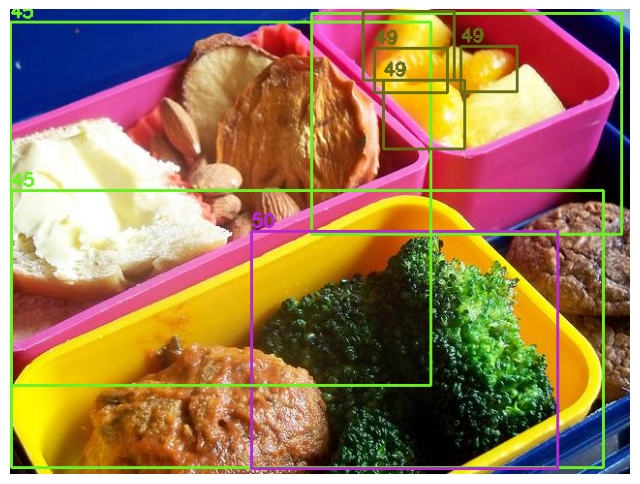

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# 경로 설정
img_dir = "coco128/images/train2017"
label_dir = "coco128/labels/train2017"

# 여기에 있는 이미지파일 이름을 바꿔가면서 테스트 해봅니다
img_name = "000000000009.jpg" 

# images 디렉토리 내의 해당 이미지 경로
img_path = os.path.join(img_dir, img_name)

# labels 디렉토리 내의 해당 이미지 경로
label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt"))

# 이미지 불러오기
img = cv2.imread(img_path)
h, w, c = img.shape

# 박스 색상 80가지를 랜덤으로 정의
random.seed(20)
colors=[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for _ in range(80)]

# 라벨 읽기
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f.readlines():
            cls, x_center, y_center, box_width, box_height = map(float, line.strip().split())
            cls = int(cls)

            # 원래 좌표로 변환
            x_center, y_center, box_width, box_height = x_center * w, y_center * h, box_width * w, box_height * h
            left = int(x_center - box_width / 2)
            top = int(y_center - box_height / 2)
            right = int(x_center + box_width / 2)
            bottom = int(y_center + box_height / 2)

            # 이미지 위에 초록색 박스 그리기
            # 왼쪽 위, 오른쪽 아래 꼭지점 정보를 주면 박스를 그릴 수 있습니다
            # 박스의 색은 (0, 255, 0)으로 (B, G, R) 체계에 의해 초록색 입니다
            # 박스의 선굵기는 2 입니다
            cv2.rectangle(img, (left, top), (right, bottom), colors[cls], 2)
            cv2.putText(img, str(cls), (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[cls], 2)

# 원본 이미지 위에 박스가 그려진 이미지를 시각화
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


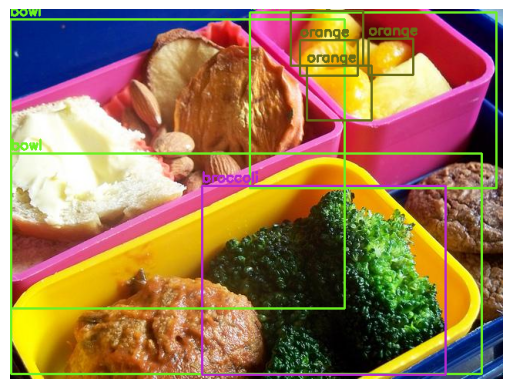

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt

# COCO 클래스 이름 dict
names = {
    0: "person", 1: "bicycle", 2: "car", 3: "motorcycle", 4: "airplane",
    5: "bus", 6: "train", 7: "truck", 8: "boat", 9: "traffic light",
    10: "fire hydrant", 11: "stop sign", 12: "parking meter", 13: "bench",
    14: "bird", 15: "cat", 16: "dog", 17: "horse", 18: "sheep", 19: "cow",
    20: "elephant", 21: "bear", 22: "zebra", 23: "giraffe", 24: "backpack",
    25: "umbrella", 26: "handbag", 27: "tie", 28: "suitcase", 29: "frisbee",
    30: "skis", 31: "snowboard", 32: "sports ball", 33: "kite", 34: "baseball bat",
    35: "baseball glove", 36: "skateboard", 37: "surfboard", 38: "tennis racket",
    39: "bottle", 40: "wine glass", 41: "cup", 42: "fork", 43: "knife",
    44: "spoon", 45: "bowl", 46: "banana", 47: "apple", 48: "sandwich",
    49: "orange", 50: "broccoli", 51: "carrot", 52: "hot dog", 53: "pizza",
    54: "donut", 55: "cake", 56: "chair", 57: "couch", 58: "potted plant",
    59: "bed", 60: "dining table", 61: "toilet", 62: "tv", 63: "laptop",
    64: "mouse", 65: "remote", 66: "keyboard", 67: "cell phone", 68: "microwave",
    69: "oven", 70: "toaster", 71: "sink", 72: "refrigerator", 73: "book",
    74: "clock", 75: "vase", 76: "scissors", 77: "teddy bear", 78: "hair drier",
    79: "toothbrush"
}

# 예시 이미지와 annotation 불러오기
img = cv2.imread("coco128/images/train2017/000000000009.jpg")
h, w, c = img.shape

# 박스 색상 80가지를 랜덤으로 정의
random.seed(20)
colors=[(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for _ in range(80)]

with open("coco128/labels/train2017/000000000009.txt") as f:
    for line in f:
        cls, x, y, box_width, box_height = map(float, line.split())
        cls = int(cls)
        # YOLO 포맷 (정규화 좌표 → 픽셀 좌표)
        left = int((x - box_width/2) * w)
        top = int((y - box_height/2) * h)
        right = int((x + box_width/2) * w)
        bottom = int((y + box_height/2) * h)

        cv2.rectangle(img, (left, top), (right, bottom), colors[cls], 2)
        cv2.putText(img, names[cls], (left, top-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[cls], 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
